# Event signatures in liquid xenon detectors

I am trying to follow the similar analysis as Scott and Brian did in the solar neutrino paper (PHYS. REV. D 102, 072009 (2020) ). 

The interactions in LXe TPC are detected via scintillation light and ionized charges. The former develops over a timescale of 100 ns which is dominated by 1) the intrinsic lifetime of the singlet and triplet dimer stats (4 and 24 ns respectively), 2) the recombination and 3) the optical transport time. The latter has event windows of up to a few milliseconds. 

## Time coincidence analysis
I adopt similar analysis methods like Scott's to simply calculate the coincidence detection efficiency, which depends on multiple factors like the xenon scintillation decay time, the size of the detector, the chosen photosensor converage and characteristics and the detector electronics.

As defined in that paper, I take $t_1$ as the minimum time seperation between the first and the second scintillation signals to be separated. The acceptance for a delayed signal to arrive in a coincidence window of length $\Delta T$ which begins at $t_1$ after a primary pulse is,

$$
\epsilon(\tau, t_1, \Delta T) = \frac{1}{\tau} \int_{t_1}^{t_1+\Delta T} e^{-t/\tau} \mathrm{d}t = e^{-t_1/\tau} - e^{-(t_1+\Delta T)/\tau},
$$
where $\tau$ is the mean lifetime of the excited nuclear state. I take $t_1=0.5\mu s$, $\Delta T=2000 \mu s$, and $624 \mu s$ of the 23 keV $e^+$ state of $^{136}\mathrm{Cs}$.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def acceptance(tau, t1, dT):
    return np.exp(-t1/tau) - np.exp(-(t1+dT)/tau)

In [73]:
dT = 1000

tau = np.logspace(-3, 2, 200)
t1 = [0.025, 0.05, 0.1, 0.2, 0.5]
e = []
for t in t1:
    e.append(acceptance(tau, t, dT))

In [74]:
i = 2
t3plus = 624 # unit: us
p3plus = np.interp(t3plus, tau, e[i])
print(f"{p3plus:.3f} acceptance for the 23 keV 3+ state in Cs-136.")
t4plus = 0.36 # unit: us
p4plus = np.interp(t4plus, tau, e[i])
print(f"{p4plus:.3f} acceptance for the 105 keV 4+ state in Cs-136.")

0.999 acceptance for the 23 keV 3+ state in Cs-136.
0.757 acceptance for the 105 keV 4+ state in Cs-136.


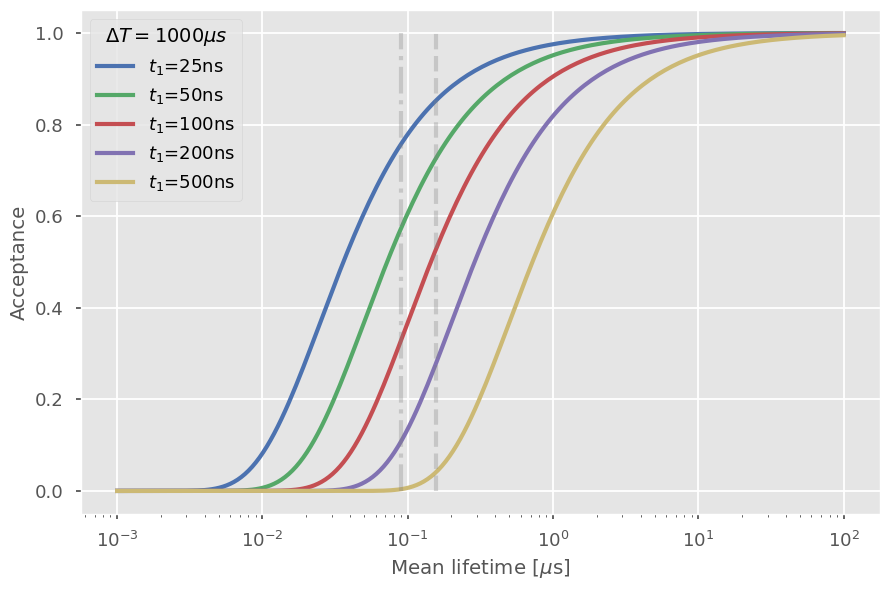

In [79]:
plt.style.use("seaborn-v0_8-deep")
fig, ax = plt.subplots(figsize=(9, 6))
for ti, ei in zip(t1, e):
    ax.plot(tau, ei, lw=3, label=r'$t_1$='+f'{ti*1000:.0f}'+r'ns')

ax.vlines(0.09, 0, 1, color='gray', linewidth=3, linestyle='-.', alpha=0.3)
#ax.text(0.030, 0.4, '90 ns', fontsize=13,)
ax.vlines(0.157, 0, 1,  color='gray', linewidth=3, linestyle='--', alpha=0.3)
#ax.text(0.180, 0.8, '157 ns', fontsize=13,)

ax.semilogx()
ax.legend(title=r'$\Delta T = 1000 \mu s$', title_fontsize=14)
ax.set_xlabel(r'Mean lifetime [$\mu$s]')
ax.set_ylabel('Acceptance')
plt.tight_layout()

Besides the time coincidence efficiency, we also need to consider 1) energy resolution and 2) vertex coincidence efficiency. In the paper, it's claimed that events in $3\sigma$ energy window will be accepted which gives a $99.7\%$ efficiency. It's also required that the prompt vertex must be close enough to the delayed vertex, which yields $93.5\%$ efficiency. Therefore, the total efficiency of the two states are, 

In [48]:
e_energy = 0.997
e_vertex = 0.935
e_4plus = p4plus * e_energy * e_vertex
e_3plus = p3plus * e_energy * e_vertex
print(f"Total efficiency of 3+ state is {e_3plus*100:.1f}%")
print(f"Total efficiency of 4+ state is {e_4plus*100:.1f}%")

Total efficiency of 3+ state is 89.4%
Total efficiency of 4+ state is 23.2%


### Cs136 decay scheme

Xe-136 is a very suitable isotope as a CC reaction target, as it features a low threshold of Q=93 keV and a relatively high cross section due to the sizable GT transition strengths connecting the $0^+$ Xe-136 ground state and the lowest-lying $1^+$ excited states of Cs136 near 590 keV and 850 keV. 

![Cs136_decay_scheme](./Cs136_decay_mode.png)

This is the decay scheme of the first $1+$ state of Cs-136 to the ground state. In 99.8% of cases the first 1+ state will rapidly decay to a very low-lying $3^+$ at 23 keV in two or three M1-dominated steps. The decay of the 23 keV $e^+$ state is then slower (~624 $\mu$s lifetime) due to the low energy of the state and the E2 nature of the decay. Such as long-lived state would produce a delayed signal.

The second $1^+$ state follows a very similar decay path to the first. The total fraction of $1^+_2$ state decays that go through the delayed $3^+_1$-to-ground-state transition is 99.9%.

The decay path is decided by the ordering of $3^+$ and $4^+$ states. There is mismatch of the $4^+$ states energy between the shell-model calculation and experimental measurements. The shell model predicts it at 39 keV while the experimental charaterize it at 105 keV. Then, the shell-model predicts the transition from the 105 keV $4^+$ state to the $5^+$ ground sxtate is dominantly M1 with a lifetime $\mathcal{O}(1 ns)$ while it's experimentally characterized as an E2 transition. The lifetime is 52 $\mu$ s (assuming the predicted level energy as 39 keV) and 360 ns (assuming 105 keV), by using the computed E2 transition strength. 

*This is from the 2020 solar neutrino paper...*

Eight delayed lines are observed in the 2023 paper (PHYSICAL REVIEW LETTERS 131, 052502 (2023)), which is required 40ns after the beam. The 66.6, 73.7 and 105.0 keV lines are measured with sufficient strengths, with the decay time constants are 90, 157 and 90 ns respectively. But the delay feature of the 105.0 keV line is actually caused by the feeding from the 140.3 keV state. Therefore, there is only rare events from the 105.0 keV line as the delay signals. 

Roughly, the first $1^+$ level decays via the transition $588.8\rightarrow 140.3$ and $588.8\rightarrow 422.1$ approximately $70\%:30\%$. The first branch ensures that there is a long-lived state in the decay path. For the second branch, there will be 2% ratio that goes into the ground state all the way as the prompt signal, while the remainder proceed through the isomeric state at 73.7 keV.

A tension is that there are two $2^+$ states at 83 keV and 224 keV predicted by the SM which have not been identified to date. One possible candidate is the 422.1 keV and the other one is the 140.2 keV.

#### M1 and E2 transitions

https://en.wikipedia.org/wiki/Selection_rule

The allowed transitions include:
1. Electric dipole (E1)
2. Magnetic dipole (M1)
3. Electric quadrupole (E2)
4. Magnetic quadrupole (M2)
5. ....

In our case, there is no parity change ($\pi^i = \pi^f$). Thus, it has to be M1 or E2 transition.


## Energy signatures

The total deposit energy in the detector equals to the neutrino energy minus the reaction threshold Q-value. The prompt signal is composed of the emitted electron and the inital relaxation of the Cs nucleus. The delayed signal will be the delayed emission of one or more ~100 keV gamma rays or IC electrons.

In our analysis, the neutrino energy is 750 keV and the reaction threhold Q = 93 keV. Therefore, the total deposit energy should be 657 keV (prompt + delay).